In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("Online Retail.xlsx", engine="openpyxl")

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Check structure & missing values
df.info()
df.describe(numeric_only=True)
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


TypeError: NDFrame.describe() got an unexpected keyword argument 'numeric_only'

In [7]:
# Structure
df.info()

# Summary stats for numeric columns only
df.describe()

# Missing values count
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Drop rows with missing CustomerID
df = df.dropna(subset=["CustomerID"])
df["CustomerID"] = df["CustomerID"].astype(int).astype(str)

# Remove cancelled orders (InvoiceNo starting with 'C')
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# Remove negative or zero Quantity & UnitPrice
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")
df = df.dropna(subset=["InvoiceDate"])

# Create TotalPrice column
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Drop duplicates
df = df.drop_duplicates()

# Check shape after cleaning
print("Shape after cleaning:", df.shape)

df.head()


Shape after cleaning: (392692, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [9]:
# Verify no negative or zero values
print("Negative Quantity:", (df["Quantity"] <= 0).sum())
print("Negative UnitPrice:", (df["UnitPrice"] <= 0).sum())

# Check for missing values again
print("\nMissing values per column:")
print(df.isnull().sum())

# Preview overall statistics
df.describe()


Negative Quantity: 0
Negative UnitPrice: 0

Missing values per column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


,Quantity,InvoiceDate,UnitPrice,TotalPrice
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,168469.600000
std,180.492832,NaN,22.241836,311.099224


In [10]:
# Top 10 products by quantity sold
top_qty = (df.groupby("Description")["Quantity"]
             .sum()
             .sort_values(ascending=False)
             .head(10))
print("Top 10 Products by Quantity:\n", top_qty)

# Top 10 products by revenue
top_rev = (df.groupby("Description")["TotalPrice"]
             .sum()
             .sort_values(ascending=False)
             .head(10))
print("\nTop 10 Products by Revenue:\n", top_rev)


Top 10 Products by Quantity:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

Top 10 Products by Revenue:
 Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LI

In [11]:
# Top 10 products by quantity sold
top_qty = (df.groupby("Description")["Quantity"]
             .sum()
             .sort_values(ascending=False)
             .head(10))
print("Top 10 Products by Quantity:\n", top_qty)

# Top 10 products by revenue
top_rev = (df.groupby("Description")["TotalPrice"]
             .sum()
             .sort_values(ascending=False)
             .head(10))
print("\nTop 10 Products by Revenue:\n", top_rev)


Top 10 Products by Quantity:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

Top 10 Products by Revenue:
 Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LI

In [12]:
monthly = (df.set_index("InvoiceDate")
             .resample("M")
             .agg(Revenue=("TotalPrice", "sum"),
                  Orders=("InvoiceNo", "nunique"),
                  Customers=("CustomerID", "nunique")))
monthly.head()


C:\Users\kaust\AppData\Local\Temp\ipykernel_19952\214883459.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,Revenue,Orders,Customers
InvoiceDate,,,
2010-12-31,570422.730,1400,885
2011-01-31,568101.310,987,741
2011-02-28,446084.920,997,758
2011-03-31,594081.760,1321,974
2011-04-30,468374.331,1149,856


In [13]:
top_customers = (df.groupby("CustomerID")["TotalPrice"]
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))
print("Top 10 Customers by Revenue:\n", top_customers)


Top 10 Customers by Revenue:
 CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: TotalPrice, dtype: float64


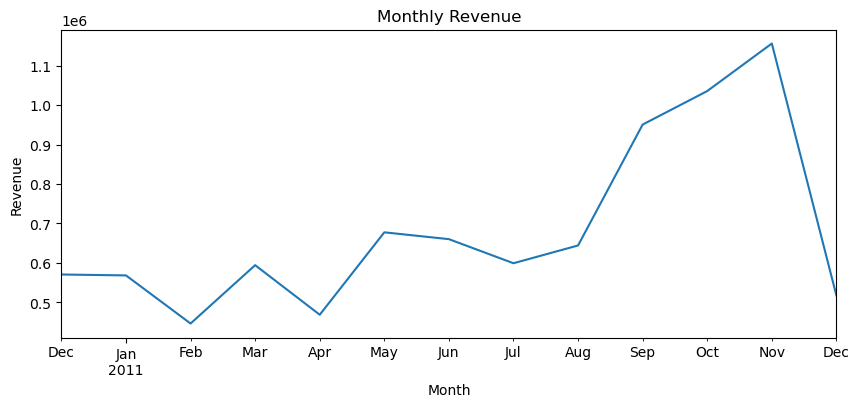

In [14]:
monthly["Revenue"].plot(figsize=(10,4), title="Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


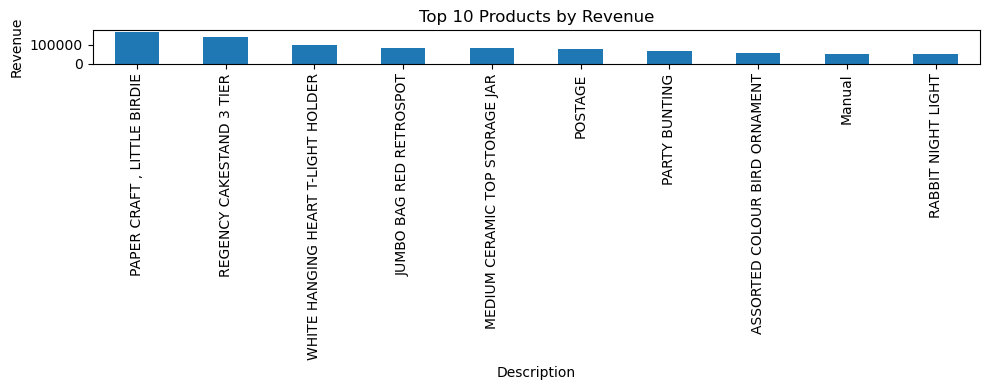

In [15]:
top_rev.plot(kind="bar", figsize=(10,4), title="Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


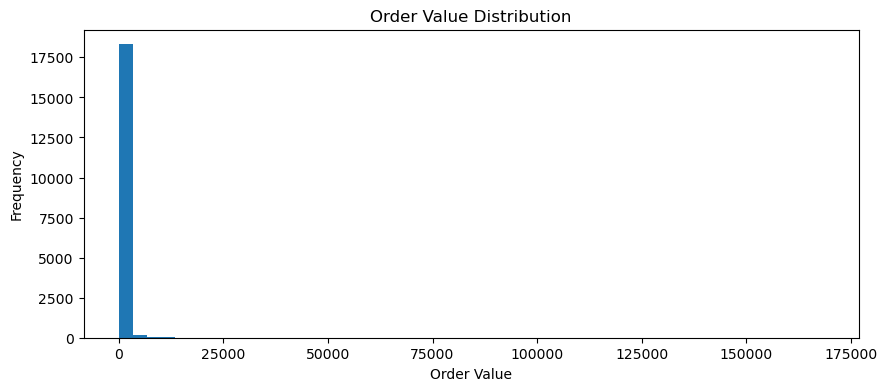

In [16]:
order_value = df.groupby("InvoiceNo")["TotalPrice"].sum()

order_value.plot(kind="hist", bins=50, figsize=(10,4), title="Order Value Distribution")
plt.xlabel("Order Value")
plt.show()


In [17]:
# Reference date = day after last purchase
ref_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = (df.groupby("CustomerID").agg(
        Recency=("InvoiceDate", lambda x: (ref_date - x.max()).days),
        Frequency=("InvoiceNo", "nunique"),
        Monetary=("TotalPrice", "sum")
      ).reset_index())

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [18]:
# Recency: lower is better, so reversed labels
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1]).astype(int)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)
rfm["M_Score"] = pd.qcut(rfm["Monetary"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)

rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Score"] = rfm[["R_Score","F_Score","M_Score"]].sum(axis=1)

rfm.sort_values("RFM_Score", ascending=False).head(10)


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
56,12417,3,9,3649.10,5,5,5,555,15
15,12362,3,10,5226.23,5,5,5,555,15
1,12347,2,7,4310.00,5,5,5,555,15
4307,18241,10,17,2073.09,5,5,5,555,15
4309,18245,7,7,2567.06,5,5,5,555,15
4291,18223,5,14,6484.54,5,5,5,555,15
934,13599,1,21,5149.92,5,5,5,555,15
991,13685,3,7,3119.44,5,5,5,555,15
1959,15033,5,10,2557.18,5,5,5,555,15
667,13230,4,14,2755.63,5,5,5,555,15


In [19]:
# Define segments based on RFM_Score
def segment_customer(score):
    if score >= 13:
        return "Champions"
    elif score >= 9:
        return "Loyal Customers"
    elif score >= 5:
        return "Needs Attention"
    else:
        return "At Risk"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)

# Segment distribution
segment_counts = rfm["Segment"].value_counts()
segment_counts


Segment
Needs Attention    1515
Loyal Customers    1346
Champions           933
At Risk             544
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Copy RFM metrics
X = rfm[["Recency", "Frequency", "Monetary"]].copy()

# Log transform to reduce skew
X = np.log1p(X)   # log(1+x) to handle zeros safely

# Standardize
scaler = StandardScaler()
Xs = scaler.fit_transform(X)


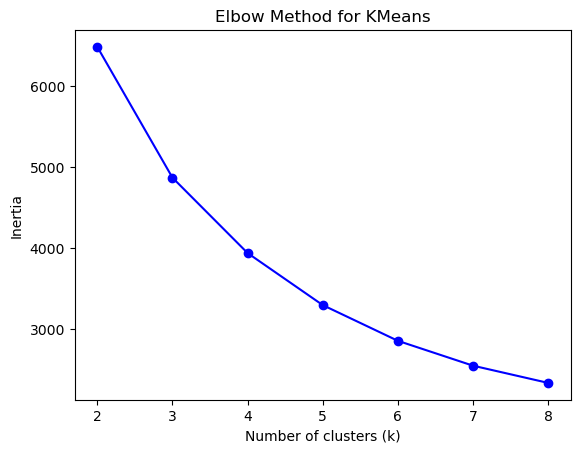

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(2, 9)  # test 2–8 clusters

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(Xs)
    inertias.append(km.inertia_)

plt.plot(K_range, inertias, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()


In [23]:
k = 4  # adjust after seeing elbow plot
km = KMeans(n_clusters=k, n_init=10, random_state=42)
rfm["Cluster"] = km.fit_predict(Xs)

# Profile each cluster
cluster_profile = rfm.groupby("Cluster")[["Recency","Frequency","Monetary","RFM_Score"]].mean()
cluster_profile


,Recency,Frequency,Monetary,RFM_Score
Cluster,,,,
0,12.171108,13.751753,8088.018331,14.347826
1,181.506782,1.316893,340.998626,5.327374
2,17.698925,2.192354,557.322616,9.401434
3,71.635506,4.078902,1801.777893,10.608062
